# Statistics for data science and measurement
## Babak Moghadas 1 and Brian Caffo 1, 2
### 1 Department of Biostatistics 
### 2 Department of Biomedical Engineering
### Bloomberg School of Public Health
### Johns Hopkins University

## About these slides

+ Goal is the least that you need to know
+ All slides are created in Jupyter notebooks - free to use and open source
+ [Github repo](https://github.com/smart-stats/odsc_2023)
+ [pyglide](https://pypi.org/project/pyglide/) provides the interactivity

## Part 2 Measurement

### Measurement

+ Key principle: repeatability - if you measure a subject twice do you get the same value
+ Key principle in measuring repeatability: compare intra-subject variation to inter-subject variation
+ Repeatability is relatively easy to measure, since we can take technical replicates
+ Repeatability does not measure validity, the extent to which a measure actually measures what it's reported to

In [4]:
## Code used to generate figures
import part2_code

#### Low inter-subject variability to intra-subject variability

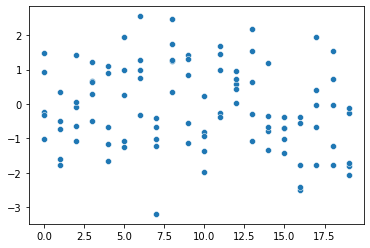

In [ ]:
part2_code.measurement1()

#### High inter-subject variability to intra-subject variability

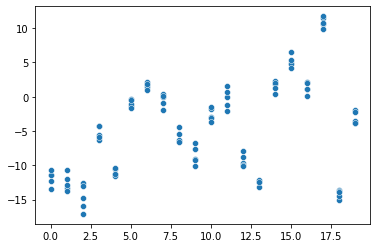

In [ ]:
part2_code.measurement2()

### ICC
+ The intra-class correlation coefficient is a measure of repeatability
$$ 
ICC = \frac{Inter}{Total} = \frac{Inter}{Inter + Intra}
$$
+ ICC is the proportion of the total variability that is inter-subject
+ Note the inter-subject varability is dependent on the sample characteristics
   + Suppose older subjects tend to have higher mean values
   + A sample of older and younger subjects will have more inter-subject variability than one of just older subjects or just younger subjects alone

#### Estimation

+ Usually estimation follows by random effect models; we'll show the basics

$$
Y_{ij} = U_i + \epsilon_{ij}
$$

+ $i$ = subject; $j$ = measurement within subject (assume $j=1,2$)
+ $U_i$ is the effect of subject $i$; variation in $U_i$ is inter-subject variation, $\sigma^2_u$
+ $\epsilon_{ij}$ is the error; variation in $\epsilon_{ij}$ is intra-subject variation, $\sigma^2$

#### Estimation continued
+ Notice that: 
   $$Y_{i2} - Y_{i1} = \epsilon_{i2} - \epsilon_{i1}$$
+ Implying
   $$Var(Y_{i2} - Y_{i1}) = 2\sigma^2$$
+ And also that: 
   $$\frac{1}{2}(Y_{i2} + Y_{i1}) = U_i + \frac{1}{2}(\epsilon_{i2} + \epsilon_{i1})$$
+ Implying
   $$Var\left[\frac{1}{2}(Y_{i2} + Y_{i1})\right] = \sigma_u^2 + \frac{\sigma^2}{2}$$

#### Estimation continued

+ So we can get: 
    $$\frac{1}{2} Var(Y_{i2} - Y_{i1}) = \sigma^2$$
+ And : 
    $$Var\left[(\frac{1}{2}(Y_{i2} + Y_{i1})\right] - \frac{\sigma^2}{2} = \sigma^2_u$$

#### Example measuring CSF

+ Below we show repeated measurements of human brain ventricle size on 20 subjects
+ We first show a scatterplot then a so-called Tukey mean/difference plot, also called a Bland/Altman plot

##### Reading in the data

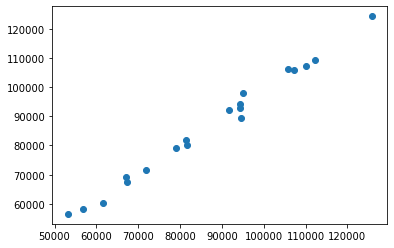

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
visit1 = pd.read_csv("assets/visit1_mricloud.csv")
visit2 = pd.read_csv("assets/visit2_mricloud.csv")

csf1 = visit1[(visit1['Type'] == 1) & (visit1['Level'] == 1) 
              & (visit1['Object'] == 'CSF')]['Volume']
csf2 = visit2[(visit2['Type'] == 1) & (visit2['Level'] == 1) 
              & (visit2['Object'] == 'CSF')]['Volume']
plt.scatter(csf1, csf2);


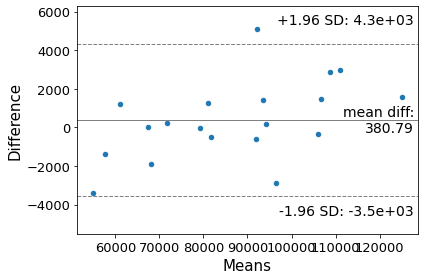

In [ ]:
import statsmodels.api as sm
sm.graphics.mean_diff_plot(csf1, csf2)
plt.show()

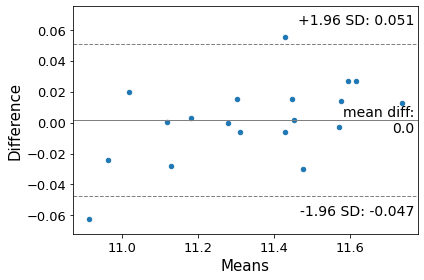

In [ ]:
import numpy as np
sm.graphics.mean_diff_plot(np.log(csf1), np.log(csf2))
plt.show()

In [ ]:
## Calculating the ICC manually
sigmasq = np.var(np.log(csf1) - np.log(csf2))
sigmausq = np.var(0.5 * np.log(csf1) + 0.5 * np.log(csf2)) - sigmasq/2
print(100 * sigmausq / (sigmausq + sigmasq))

98.84502763511378


#### Notes
+ This is not how one typically estimates ICC anymore; mixed models are typically used
+ The subtraction can result in a negative variance estimate

In [ ]:
#### Fitting the random effect model
import pingouin as pg
import statsmodels.formula.api as smf

csfdf1 = visit1[(visit1['Type'] == 1) & (visit1['Level'] == 1) 
                & (visit1['Object'] == 'CSF')]
csfdf2 = visit2[(visit2['Type'] == 1) & (visit2['Level'] == 1) 
                & (visit2['Object'] == 'CSF')]

csfdf = pd.concat( [csfdf1, csfdf2] )
csfdf['logvolume'] = np.log(csfdf['Volume'])
md = smf.mixedlm("logvolume ~ 1", csfdf, groups=csfdf["ID"]).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: logvolume
No. Observations: 38      Method:             REML     
No. Groups:       19      Scale:              0.0003   
Min. group size:  2       Log-Likelihood:     41.9000  
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   11.345    0.055 207.545 0.000 11.237 11.452
Group Var    0.057    1.491                            
=======================================================

"""

##### Example
Calculation of ICC in the same example using the mixedlm function.
<div><!--Course_Code--></div>


#### Example of repeatability studies
+ In functional brain imaging one typically looks at the correlation in activity over time between brain regions
+ These sets of correlations estimate how different areas of the brain coordinate
+ Finn et al. (Nature Neuroscience 2015) used brain connectivity as a "fingerprint"
  + They took pairs of measurements for subjects and found which measurements were the closest
  + The count of the number of instances where a subject matched to themselves is a repeatability 
    metric. They called it the "functional connectome fingerprint"

#### Fun fact
+ In 1713 Montmort published his letters with Nicholaus Bernoulli 
+ In them he demonstrated that under independence, i.e. that fingerprints are being matched only by chance, the number of matches follows what is now called Montmort's matching distribution
+ This distribution limits to a Poisson(1)
+ Wang (2021, Canadian Journal of Statistics) showed that any reasonable matching strategy also limits to a Poisson(1)
+ The convergence is quite fast

<img src="assets/Montmort.jpeg" alt="Picture of Montmort"/>

[Coutesy of MacTutor](https://mathshistory.st-andrews.ac.uk/Biographies/Montmort/)

<img src="assets/figure_5_twin.png" alt="Figure 5 from Finn et al. (2015)" width="600"/>

Courtesy of Wang et al. (2021 Canadian Journal of Statistics)

<img src="assets/figure_8.png" alt="Figure 6 from Finn et al. (2015)" width="600"/>


Courtesy of Wang et al. (2021 Canadian Journal of Statistics)

### Validity

+ Repeatability is not a measure of validity, that a construct measures what it purports to
+ Repeatability is easy to measure, since we can collect technical replicates, observe units over short periods of time and so on
+ Validity is often hard because the measurement we'd like to validate is the current best measure of the thing we'd like to estimate!

#### Things to try

+ In the absence of a measurment gold standard, the statistical proceduer I find most useful is  **Predictive validity**: is the measurement associated with outcomes that it should be?
+ Also useful, **concurrent validity** is the measurement correlated with other measures of the target?
+ Example: in a poor country where child ages are hard to determine due to poor record keeping an image based DL algorithm is used to estimate age. 
  + Repeatability - take different pictures of the same subject, do the predicted ages agree?
  + Predictive validity - does the estimated age predict developmental milestones at roughly the right time
  + Concurrent validity - is the estimated age correlated with height, weight and other measures of size